<a href="https://colab.research.google.com/github/Aravinda89/Image-Classificatio-from-Scratch/blob/main/Stochastic_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! [ -e /content ] && pip install -Uqq fastai2

     |████████████████████████████████| 179 kB 4.1 MB/s 


In [4]:
from fastai.basics import *
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from fastai.torch_core import tensor

In [5]:
n=100
x = torch.ones(n,2)

In [7]:
x.shape

torch.Size([100, 2])

In [8]:
len(x), x[:5]

(100, tensor([[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]]))

In [11]:
x[:,0].uniform_(-1., 1)
x[:5], x.shape

(tensor([[-0.2450,  1.0000],
         [-0.6486,  1.0000],
         [ 0.5882,  1.0000],
         [ 0.9421,  1.0000],
         [ 0.3997,  1.0000]]), torch.Size([100, 2]))

Any linear model is y=mx+b
m, x, and b are matrices

In [16]:
m = tensor(3.,2); m, m.shape

(tensor([3., 2.]), torch.Size([2]))

In [13]:
m

tensor([3., 2.])

In [17]:
b = torch.rand(n); b[:5], b.shape

(tensor([0.3534, 0.6031, 0.8773, 0.8764, 0.0966]), torch.Size([100]))

In [18]:
m

tensor([3., 2.])

In [19]:
b

tensor([0.3534, 0.6031, 0.8773, 0.8764, 0.0966, 0.3864, 0.3310, 0.2879, 0.5281,
        0.4462, 0.6827, 0.4584, 0.7410, 0.3893, 0.2536, 0.1765, 0.5107, 0.8745,
        0.9964, 0.8327, 0.7949, 0.2922, 0.8680, 0.7533, 0.6810, 0.9534, 0.5012,
        0.9568, 0.1614, 0.6868, 0.3944, 0.3129, 0.8466, 0.1650, 0.0477, 0.5259,
        0.4158, 0.3622, 0.5578, 0.5913, 0.6210, 0.2512, 0.3089, 0.0503, 0.7764,
        0.3073, 0.0864, 0.3589, 0.2602, 0.2692, 0.8535, 0.9907, 0.6528, 0.3653,
        0.5603, 0.5426, 0.6979, 0.3686, 0.7513, 0.6049, 0.4878, 0.0306, 0.3393,
        0.8428, 0.5223, 0.7557, 0.6106, 0.8667, 0.6192, 0.2605, 0.5133, 0.5866,
        0.8462, 0.7026, 0.5004, 0.1982, 0.4021, 0.2824, 0.6375, 0.8649, 0.0389,
        0.5121, 0.5236, 0.4276, 0.3429, 0.6323, 0.1608, 0.2981, 0.3970, 0.0451,
        0.9807, 0.5168, 0.1231, 0.1251, 0.5133, 0.8153, 0.8651, 0.5303, 0.1235,
        0.5020])

Matrix multiplication is denoted with @

y = x@m + b

In [21]:
y = x@m + b

In [22]:
y 

tensor([ 1.6183,  0.6572,  4.6418,  5.7028,  3.2956,  5.0755,  3.0861, -0.0926,
         4.4248,  1.3080,  1.8719,  1.4511,  2.0107,  2.1462, -0.6416,  3.8262,
        -0.4698,  4.6145,  4.3021,  4.5269,  2.4405,  0.4474,  3.4970, -0.0937,
         1.2491,  4.8563, -0.2029,  3.4793,  2.4798,  2.6579,  4.9484,  4.5251,
         2.2372,  3.8416,  5.0260,  5.5132, -0.5649,  1.1370,  4.2229,  3.8832,
         4.6568, -0.2084,  2.0101,  1.3324,  5.6401,  1.4743,  0.2834,  5.1737,
        -0.2101,  1.7525,  5.5857,  0.4143,  5.2604,  2.3252,  3.2114,  3.9430,
         2.3228,  0.1892,  2.6658,  1.9969,  3.0268,  4.4324,  1.8226,  5.4237,
        -0.0765,  5.6951,  5.4629,  4.2201,  3.2459,  2.4993,  2.6859,  3.1404,
         4.3844,  1.7693,  2.1314,  4.6803,  3.7377, -0.1156,  5.1307,  0.1975,
        -0.7546,  0.0229,  2.6830,  0.3069,  3.6819,  3.4611,  3.6162, -0.6860,
         4.8037, -0.1847,  1.6779,  1.9808,  1.8057,  3.8463,  5.0000,  4.9227,
         3.6765,  5.4424,  0.3642,  2.09

In [23]:
y .shape

torch.Size([100])

In [24]:
x[:,0]

tensor([-0.2450, -0.6486,  0.5882,  0.9421,  0.3997,  0.8964,  0.2517, -0.7935,
         0.6322, -0.3794, -0.2703, -0.3358, -0.2434, -0.0810, -0.9651,  0.5499,
        -0.9935,  0.5800,  0.4352,  0.5647, -0.1181, -0.6149,  0.2097, -0.9490,
        -0.4773,  0.6343, -0.9014,  0.1742,  0.1061, -0.0096,  0.8513,  0.7374,
        -0.2032,  0.5588,  0.9928,  0.9958, -0.9936, -0.4084,  0.5550,  0.4306,
         0.6786, -0.8199, -0.0996, -0.2393,  0.9545, -0.2776, -0.6010,  0.9383,
        -0.8235, -0.1722,  0.9107, -0.8588,  0.8692, -0.0134,  0.2170,  0.4668,
        -0.1250, -0.7265, -0.0285, -0.2027,  0.1797,  0.8006, -0.1722,  0.8603,
        -0.8663,  0.9798,  0.9508,  0.4511,  0.2089,  0.0796,  0.0575,  0.1846,
         0.5127, -0.3111, -0.1230,  0.8274,  0.4452, -0.7993,  0.8311, -0.8891,
        -0.9312, -0.8297,  0.0531, -0.7069,  0.4463,  0.2763,  0.4851, -0.9947,
         0.8022, -0.7433, -0.4343, -0.1787, -0.1058,  0.5738,  0.8289,  0.7025,
         0.2705,  0.9707, -0.5864, -0.13

In [25]:
x[:,0].shape

torch.Size([100])

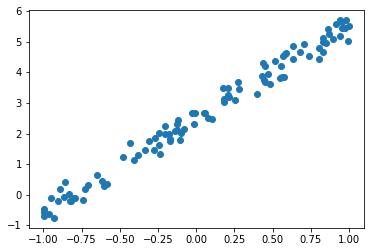

In [26]:
plt.scatter(x[:,0], y)

mean squared error

In [27]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

trying to predict m

In [28]:
a = tensor(.5, .75)

In [29]:
y_pred = x@a

In [30]:
y_pred

tensor([0.6275, 0.4257, 1.0441, 1.2211, 0.9498, 1.1982, 0.8759, 0.3532, 1.0661,
        0.5603, 0.6149, 0.5821, 0.6283, 0.7095, 0.2675, 1.0250, 0.2532, 1.0400,
        0.9676, 1.0324, 0.6909, 0.4425, 0.8548, 0.2755, 0.5113, 1.0671, 0.2993,
        0.8371, 0.8031, 0.7452, 1.1757, 1.1187, 0.6484, 1.0294, 1.2464, 1.2479,
        0.2532, 0.5458, 1.0275, 0.9653, 1.0893, 0.3401, 0.7002, 0.6303, 1.2273,
        0.6112, 0.4495, 1.2191, 0.3383, 0.6639, 1.2054, 0.3206, 1.1846, 0.7433,
        0.8585, 0.9834, 0.6875, 0.3868, 0.7357, 0.6487, 0.8398, 1.1503, 0.6639,
        1.1801, 0.3169, 1.2399, 1.2254, 0.9756, 0.8544, 0.7898, 0.7788, 0.8423,
        1.0064, 0.5944, 0.6885, 1.1637, 0.9726, 0.3503, 1.1655, 0.3054, 0.2844,
        0.3351, 0.7766, 0.3965, 0.9732, 0.8881, 0.9926, 0.2526, 1.1511, 0.3784,
        0.5329, 0.6607, 0.6971, 1.0369, 1.1645, 1.1012, 0.8852, 1.2354, 0.4568,
        0.6816])

In [31]:
mse(y_pred, y)

tensor(6.2485)

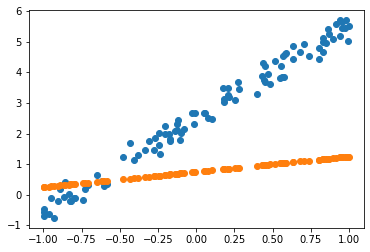

In [32]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_pred)

In [33]:
a = nn.Parameter(a); a

Parameter containing:
tensor([0.5000, 0.7500], requires_grad=True)

In [34]:
def update():
  y_hat = x@a
  loss = mse(y, y_hat)
  if i % 10 == 0: print(loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr * a.grad)
    a.grad.zero_()

In [35]:
lr = 1e-1

In [36]:
for i in range(100): update()

tensor(6.2485, grad_fn=<MeanBackward0>)
tensor(0.5568, grad_fn=<MeanBackward0>)
tensor(0.1591, grad_fn=<MeanBackward0>)
tensor(0.0845, grad_fn=<MeanBackward0>)
tensor(0.0690, grad_fn=<MeanBackward0>)
tensor(0.0657, grad_fn=<MeanBackward0>)
tensor(0.0650, grad_fn=<MeanBackward0>)
tensor(0.0649, grad_fn=<MeanBackward0>)
tensor(0.0648, grad_fn=<MeanBackward0>)
tensor(0.0648, grad_fn=<MeanBackward0>)


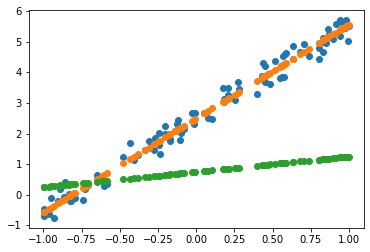

In [37]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0], (x@a).detach())
plt.scatter(x[:,0],y_pred)

In [38]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [39]:
a = nn.Parameter(tensor(0.5, 0.75)); a

Parameter containing:
tensor([0.5000, 0.7500], requires_grad=True)

In [40]:
def animate(i):
  update()
  line.set_ydata((x@a).detach())
  return line,

In [41]:
fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], (x@a).detach())
plt.close()

In [42]:
animation.FuncAnimation(fig, animate, np.arange(0,100), interval=20)